#  Microsoft Engage 2022
#  Analysis of Automotive Industry Data
 

submitted by: 
### Vedant Deshmukh 
### B.Tech 2nd year, 
### EEE, NIT Warangal.

## Objective:
1. To perform overall and individual data analysis for automobile companies.
2. To determine how this analysis can be used in the real world.
3. To develop an interactive web application for showing results.  

## Present study:
I have used provided sample automobile dataset for the current investigation.
Using 2021 data from Google, the 'sale_quantity’ column has been added to the dataset, representing the number of units sold for the corresponding model.
The analysis is divided into 2 parts: a) Overall, b) Individual
In the overall analysis, various features have been analyzed for all companies together. In individual analysis, various features have been analyzed for individual companies.
After obtaining results and drawing conclusions, the Streamlit library has been used to develop a web application for showing the same.

## Roadmap for the study is as follows:
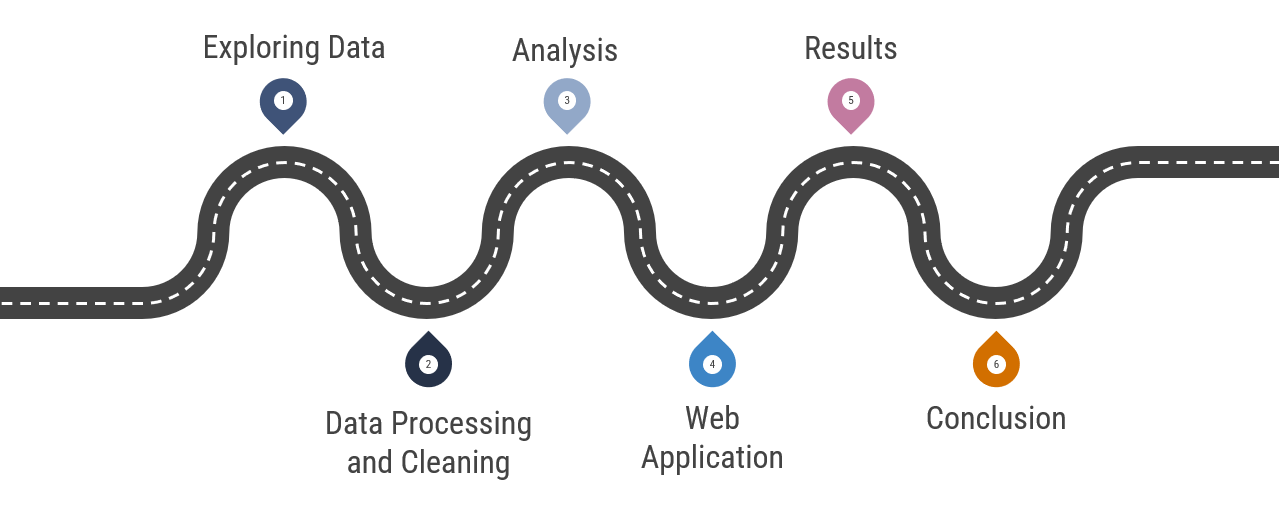

In [1]:
#importing important libraries
import numpy as np
import pandas as pd

# 1. Exploring and Reading Data:

In [2]:
car_raw=pd.read_csv('car_dataset.csv')

In [3]:
car_raw

,Unnamed: 0,Make,Model,Variant,Ex_Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range,sale_month,sale_quantity
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9124
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10094
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,9601
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,9716
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,9051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,6,5055
1272,1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,7,4905
1273,1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,12,3050
1274,1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,4,7590


Let's see the columns and their number in the dataframe 

In [4]:
car_raw.columns

Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex_Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Engine_Type', 'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range',
       'sale_month', 'sale_quantity'],
      dtype='object', length=143)

Selecting important columns out of these 143 columns

In [5]:
selected_columns=[
    'Make',
    'Model',
    'Variant',
    'sale_quantity',
    'sale_month',
    'Ex_Showroom_Price',
    'Displacement',
    'Type',
    'Emission_Norm',
    'Fuel_Type',
    'City_Mileage',
    'Highway_Mileage',
    'ARAI_Certified_Mileage',
    'ARAI_Certified_Mileage_for_CNG',
    'Seating_Capacity',
    'Airbags',
    'Number_of_Airbags',
    'Kerb_Weight',
    'Gears',
    'Body_Type',
    'Height',
    'Length',
    'Width',
    'Fuel_System',
    
]

New dataframe containing selected columns:

In [6]:
car=car_raw[selected_columns].copy()

## 2. Data Preparation and Data cleaning

Checking the number of empty values in each column 

In [7]:
car.isnull().sum()

Make                                66
Model                                0
Variant                              0
sale_quantity                        0
sale_month                           0
Ex_Showroom_Price                    0
Displacement                        12
Type                                 1
Emission_Norm                       11
Fuel_Type                            0
City_Mileage                       555
Highway_Mileage                    800
ARAI_Certified_Mileage             114
ARAI_Certified_Mileage_for_CNG    1249
Seating_Capacity                     6
Airbags                            132
Number_of_Airbags                  135
Kerb_Weight                        365
Gears                              105
Body_Type                            6
Height                               1
Length                               0
Width                               12
Fuel_System                          8
dtype: int64

Since City_Mileage and Highway_Mileage have a large number of nan values, these columns are dropped.

ARAI_Certified_Mileage_for_CNG have many nan values because that column is only for CNG cars.

Kerb Weight column is also dropped, as it has large number of nan values.

In [8]:
#Dropping the columns
car. drop(['City_Mileage','Highway_Mileage','Kerb_Weight'], axis=1, inplace=True)

#### 2.1. 'Make' column

Let's see the rows with 'Make' values as empty

In [9]:
car[pd.isnull(car['Make'])]

,Make,Model,Variant,sale_quantity,sale_month,Ex_Showroom_Price,Displacement,Type,Emission_Norm,Fuel_Type,...,ARAI_Certified_Mileage_for_CNG,Seating_Capacity,Airbags,Number_of_Airbags,Gears,Body_Type,Height,Length,Width,Fuel_System
252,NaN,Mercedes-Benz B-Class,B 180 Sport,829,5,"Rs. 29,88,311",1595 cc,Automatic,BS IV,Petrol,...,NaN,5.0,"Driver pelvic airbag, Driver frontal airbag, F...",7,7,MPV,1557 mm,4393 mm,1786 mm,Injection
253,NaN,Mercedes-Benz B-Class,B 200 Cdi Sport,660,9,"Rs. 30,89,851",2143 cc,Automatic,BS IV,Diesel,...,NaN,5.0,"Driver pelvic airbag, Front passenger frontal ...",7,7,MPV,1557 mm,4393 mm,1786 mm,Injection
254,NaN,Mercedes-Benz B-Class,B 180 Night Edition,180,5,"Rs. 31,98,662",1595 cc,Automatic,BS IV,Petrol,...,NaN,5.0,"Driver pelvic airbag, Driver frontal airbag, F...",6,7,MPV,1557 mm,4393 mm,1786 mm,Injection
255,NaN,Mercedes-Benz B-Class,B 200 Cdi Night Edition,880,6,"Rs. 33,03,282",2143 cc,Automatic,BS IV,Diesel,...,NaN,5.0,"Driver pelvic airbag, Front passenger frontal ...",6,7,MPV,1557 mm,4393 mm,1786 mm,Injection
256,NaN,Mercedes-Benz Cla-Class,200 Sport,1418,11,"Rs. 35,99,000",1991 cc,Automatic,BS IV,Petrol,...,NaN,5.0,"Drive side airbag, Driver frontal airbag, Curt...",6,7,Sedan,1432 mm,4630 mm,1777 mm,Injection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,NaN,Mercedes-Benz Gla-Class,45 Aero Edition,105,8,"Rs. 80,67,000",1991 cc,Automatic,BS IV,Petrol,...,NaN,5.0,"Drive side airbag, Driver frontal airbag, Fron...",6,7,SUV,1479 mm,4445 mm,1804 mm,Injection
1219,NaN,Rolls-Royce Phantom,Sedan,11,7,"Rs. 9,50,00,000",6749 cc,Automatic,BS IV,Petrol,...,NaN,5.0,"Driver frontal airbag, Curtain airbags, Front ...",6,8,Sedan,1638 mm,5842 mm,1990 mm,Injection
1220,NaN,Rolls-Royce Phantom,Ewb,16,7,"Rs. 7,54,00,000",6749 cc,Automatic,BS IV,Petrol,...,NaN,5.0,"Driver frontal airbag, Front passenger frontal...",6,8,Sedan,1640 mm,6092 mm,1990 mm,Injection
1251,NaN,Mercedes-Benz Glc,200 Progressive,129,10,"Rs. 52,75,000",1991 cc,Automatic,BS 6,Petrol,...,NaN,5.0,"Front passenger curtain airbag, Driver curtain...",7,9,SUV,1644 mm,4658 mm,1890 mm,Injection


We can see, most of the cars with nan 'Make' value are of Mercedes-Benz and Rolls-Royce.

We will fill empty 'Make' column spaces with their model names. 

If make column contains Mercedes-Benz as substring, then we will replace it with Mercedes-Benz. 

We will follow same procedure for Rolls-Royce

In [10]:
car.Make=car.Make.fillna(car.Model)

Now we will modify the Make column 

In [11]:
for i in range(0,len(car.Make)) :
    if 'Mercedes-Benz' in car.at[i,'Make'] :
        car.at[i,'Make']='Mercedes-Benz'
    if 'Rolls-Royce' in car.at[i,'Make'] :
        car.at[i,'Make']='Rolls-Royce'
    i=i+1

#### 2.2. Ex Showroom Price, Displacement, Height, Length, Width
We will convert these columns from string to numeric data 

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
car['Ex_Showroom_Price']=car['Ex_Showroom_Price'].str.replace(r'\D+', '');
car['Ex_Showroom_Price']=pd.to_numeric(car.Ex_Showroom_Price, errors='coerce');
car['Displacement']=car['Displacement'].str.replace(r'\D+', '');
car['Displacement']=pd.to_numeric(car.Displacement, errors='coerce');
car['Height']=car['Height'].str.replace(r'\D+', '');
car['Height']=pd.to_numeric(car.Height,errors='coerce');
car['Length']=car['Length'].str.replace(r'\D+', '');
car['Length']=pd.to_numeric(car.Length,errors='coerce');
car['Width']=car['Width'].str.replace(r'\D+', '');
car['Width']=pd.to_numeric(car.Width,errors='coerce');


We will deal with displacement nan values and we will change only non electric cars' displacement

In [13]:
dis=car[pd.isnull(car['Displacement'])]
dis[dis.Fuel_Type!='Electric']

,Make,Model,Variant,sale_quantity,sale_month,Ex_Showroom_Price,Displacement,Type,Emission_Norm,Fuel_Type,...,ARAI_Certified_Mileage_for_CNG,Seating_Capacity,Airbags,Number_of_Airbags,Gears,Body_Type,Height,Length,Width,Fuel_System
862,Mercedes-Benz,Mercedes-Benz Amg Gt 4-Door Coupe,63 S 4Matic+,36,12,24200000,NaN,Automatic,BS 6,Petrol,...,NaN,4.0,NaN,NaN,7,Coupe,1447.0,5054,1953.0,Injection


There is only one non electric car with empty displacement value. 

For this, I haved searched the internet and obtained 3982 cc as the answer. 

In [14]:
car.at[861,'Displacement']=3982

Let's see Height and width columns nan values

In [15]:
car[pd.isnull(car['Height'])][['Make','Model','Body_Type']]

,Make,Model,Body_Type
314,Audi,Rs5,Coupe


Only one row has empty value for Height.

After searching for the same, the value obtained is 1409 mm.

In [16]:
car['Height']=car['Height'].fillna(1409)

Width column Null values:

In [17]:
car[pd.isnull(car['Width'])][['Make','Model','Body_Type']]

,Make,Model,Body_Type
314,Audi,Rs5,Coupe
440,Icml,Extreme,SUV
441,Icml,Extreme,SUV
442,Icml,Extreme,SUV
443,Icml,Extreme,SUV
444,Icml,Extreme,SUV
445,Icml,Extreme,SUV
446,Icml,Extreme,SUV
447,Icml,Extreme,SUV
448,Icml,Extreme,SUV


Again, there are only two models of car. 

After taking help from the internet values are found to be 1866 mm for Audi Rs5 and 1885 mm for Icml Extreme.

In [18]:
car.at[314,'Width']=1866

In [19]:
car['Width']=car['Width'].fillna(1885)

#### 2.3. Type of car 

In [20]:
car[pd.isnull(car['Type'])]

,Make,Model,Variant,sale_quantity,sale_month,Ex_Showroom_Price,Displacement,Type,Emission_Norm,Fuel_Type,...,ARAI_Certified_Mileage_for_CNG,Seating_Capacity,Airbags,Number_of_Airbags,Gears,Body_Type,Height,Length,Width,Fuel_System
303,Mercedes-Benz,Mercedes-Benz E-Class Cabriolet,E400,934,3,7711338,2996.0,NaN,BS IV,Petrol,...,NaN,4.0,"Curtain airbags, Driver frontal airbag, Drive ...",6,NaN,Convertible,1398.0,4703,1786.0,Injection


There is only car with type with nan value. 

Internet suggests that the car is automatic. 

Hence nan value is replaced with Automatic

In [21]:
car.at[303,'Type']='Automatic'

#### 2.4. Emission Norm

In [22]:
car['Emission_Norm'].unique()

array(['BS IV', 'BS 6', nan, 'BS III', 'BS VI'], dtype=object)

Since BS VI and BS 6 are same, BS 6 is replaced with BS VI.

In [23]:
car['Emission_Norm'] =car['Emission_Norm'].replace('BS 6', 'BS VI')
car['Emission_Norm'].unique()

array(['BS IV', 'BS VI', nan, 'BS III'], dtype=object)

In [24]:
# ems is dataframe which has Emission norm empty values
ems=car[pd.isnull(car['Emission_Norm'])]

Emission norm value counts:

In [25]:
car.Emission_Norm.value_counts()

BS IV     879
BS VI     377
BS III      9
Name: Emission_Norm, dtype: int64

Checking empty Emission norm types for companies

In [26]:
ems.Make.unique()

array(['Mahindra', 'Honda', 'Aston Martin', 'Land Rover Rover',
       'Mitsubishi', 'Jaguar', 'Hyundai'], dtype=object)

In [27]:
car[car.Make=='Mahindra'].Emission_Norm.value_counts()

BS IV     103
BS VI      11
BS III      1
Name: Emission_Norm, dtype: int64

In [28]:
car[car.Make=='Honda'].Emission_Norm.value_counts()

BS IV    32
BS VI    31
Name: Emission_Norm, dtype: int64

In [29]:
car[car.Make=='Aston Martin'].Emission_Norm.value_counts()

BS IV    2
Name: Emission_Norm, dtype: int64

In [30]:
car[car.Make=='Land Rover Rover'].Emission_Norm.value_counts()

BS IV    21
BS VI     4
Name: Emission_Norm, dtype: int64

In [31]:
car[car.Make=='Mitsubishi'].Emission_Norm.value_counts()

BS IV    6
Name: Emission_Norm, dtype: int64

In [32]:
car[car.Make=='Hyundai'].Emission_Norm.value_counts()

BS IV    103
BS VI     26
Name: Emission_Norm, dtype: int64

All makers except Honda are using BS IV excessively. 

As frequency for both BS IV and BS VI are almost similar for Honda, it is better to drop nan values rather than filling them.

For others BS IV is filled in place of null values

In [33]:
# dropping Honda nan row
condition=(car.Make=='Honda')&(car.Emission_Norm.isna())
car=car[~condition]
# reseting indices
car=car.reset_index(drop=True)

In [34]:
# filling other empty spaces with BS IV
car['Emission_Norm']=car['Emission_Norm'].fillna('BS IV')

#### 2.5. Body Type

In [35]:
car[pd.isnull(car['Body_Type'])][['Make','Model','Length','Width','Height']]

,Make,Model,Length,Width,Height
239,Mahindra,Alturas G4,4850,1960.0,1845.0
842,Maserati,Ghibli,4971,2100.0,1461.0
843,Maserati,Ghibli,4971,2100.0,1461.0
844,Maserati,Ghibli,4971,2100.0,1461.0
1252,Porsche,Cayenne Coupe,4931,2194.0,1676.0
1253,Porsche,Cayenne Coupe,4931,2194.0,1676.0


There are only three models. 

For accuracy, I've searched it on google and found their body types. 

Mahindra Alturus G4 is 'SUV', Maserati Ghibli is 'sedan' and Porsche Cayenne Coupe is 'coupe'. 

In [36]:
car.at[239,'Body_Type']='SUV'
car.at[1252,'Body_Type']='Coupe'
car.at[1253,'Body_Type']='Coupe'
car['Body_Type']=car['Body_Type'].fillna('Sedan')


#### 2.6. Seating capacity

In [37]:
car[pd.isnull(car['Seating_Capacity'])][['Make','Model','Body_Type']]

,Make,Model,Body_Type
239,Mahindra,Alturas G4,SUV
242,Volkswagen,Tiguan,SUV
597,Renault,Lodgy,MUV
1161,Jaguar,F-Type,Convertible
1252,Porsche,Cayenne Coupe,Coupe
1253,Porsche,Cayenne Coupe,Coupe


Checking seating capacity according to Body Type of the car

In [38]:
car[car.Body_Type=='MUV'].Seating_Capacity.value_counts()

7.0     27
8.0      9
6.0      1
16.0     1
Name: Seating_Capacity, dtype: int64

Null values in  seating capacity corresponding to MUV body type are replaced by 7

In [39]:
car.at[597,'Seating_Capacity']=7

There are two same models of coupe car, their seating capacity found out to be 4. 

Seating capacity of Jaguar F type convertible is found out to be 2.

In [40]:
car.at[1252,'Seating_Capacity']=4
car.at[1253,'Seating_Capacity']=4
car.at[1161,'Seating_Capacity']=2

In [41]:
car[car.Body_Type=='SUV'].Seating_Capacity.value_counts()

5.0    275
7.0    136
9.0     19
4.0      6
6.0      6
8.0      3
Name: Seating_Capacity, dtype: int64

As there is confusion between 5 and 7 for SUV cars, empty 'SUV' rows are dropped.

In [42]:
condition=(car.Body_Type=='SUV')&(car.Seating_Capacity.isna())
car=car[~condition]
# reseting indices
car=car.reset_index(drop=True)

#### 2.7. Airbags

In [43]:
car['Airbags']=car['Airbags'].fillna('No airbag')

In [44]:
car['Number_of_Airbags']=car['Number_of_Airbags'].fillna(0)

Delete the rows for which airbags entry is present but number of air bags entry is zero.

In [45]:
for i in range(0,len(car.Make)) :
    if car.at[i,'Airbags']!='No airbag' and car.at[i,'Number_of_Airbags']==0 :
        car.drop(i, axis=0, inplace=True)
    i=i+1
car=car.reset_index(drop=True)


#### 2.8. Number of Gears

Checking number of nan entries for Gears column:

In [46]:
car.Gears.isnull().sum()

103

AS it is almost impossible to predict number of gears in 103 rows, the column Gears is dropped,

In [47]:
car. drop(['Gears'], axis=1, inplace=True) 

#### 2.9. Fuel System

Checking the frequencies of cars using different types of fuel system: 

In [48]:
car['Fuel_System'].value_counts()

Injection    1259
PGM - Fi        4
Name: Fuel_System, dtype: int64

As most of the models have Injection Type fuel system, nan entries are filled with Injection Type 

In [49]:
car['Fuel_System']=car['Fuel_System'].fillna('Injection')

#### 2.10. ARAI Certified Mileages

Convering from string to numeric:

In [50]:
car['ARAI_Certified_Mileage']=car['ARAI_Certified_Mileage'].str.replace(r'\D+', '');
car['ARAI_Certified_Mileage']=pd.to_numeric(car.ARAI_Certified_Mileage,errors='coerce');
car['ARAI_Certified_Mileage_for_CNG']=car['ARAI_Certified_Mileage_for_CNG'].str.replace(r'\D+', '');
car['ARAI_Certified_Mileage_for_CNG']=pd.to_numeric(car.ARAI_Certified_Mileage_for_CNG,errors='coerce');


Since the mileages are converted from string to numeric, the function does not consider the decimal points in between so we will divide all mileages by 10 till values are below 50.

In [51]:
# function to change mileages
def div_till(x):
    while x>50 :
        x=x/10
    return x

In [52]:
for i in range(0,len(car.Make)):
    car.at[i,'ARAI_Certified_Mileage']=div_till(car.at[i,'ARAI_Certified_Mileage'])
    car.at[i,'ARAI_Certified_Mileage_for_CNG']=div_till(car.at[i,'ARAI_Certified_Mileage_for_CNG'])
    i=i+1    

Dropping rows where the car has fuel type as CNG but having empty value for ARAI Certified Mileage for CNG

In [53]:
condition=(car.Fuel_Type=='CNG')&(car.ARAI_Certified_Mileage_for_CNG.isna())
car=car[~condition]
# reseting indices
car=car.reset_index(drop=True)

Checking rows where fuel type is Petrol or Diesel but ARAI_Certified_Mileage is not present:

In [54]:
condition=((car.Fuel_Type=='Petrol') | (car.Fuel_Type=='Diesel'))&(car.ARAI_Certified_Mileage.isna())
car[condition].ARAI_Certified_Mileage.info()

<class 'pandas.core.series.Series'>
Int64Index: 75 entries, 114 to 1198
Series name: ARAI_Certified_Mileage
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 1.2 KB


Instead of dropping 75 rows, nan values are replaced by mean mileage.

In [55]:
car[['ARAI_Certified_Mileage']].describe()

,ARAI_Certified_Mileage
count,1157.000000
mean,18.255421
std,4.701962
min,4.000000
25%,15.410000
50%,18.190000
75%,21.400000
max,35.000000


In [56]:
for i in range(0,len(car.Make)) :
    if (car.at[i,'Fuel_Type']=='Petrol' or car.at[i,'Fuel_Type']=='Diesel') and not(car.at[i,'ARAI_Certified_Mileage']>0) :
           car.at[i,'ARAI_Certified_Mileage']= car[['ARAI_Certified_Mileage']].mean() 


Adding a new column 'Total Revenue' in dataframe which represents total revenue in billion rupees:

In [57]:
car['Total_revenue']=car['sale_quantity']*car['Ex_Showroom_Price']/1e9

Modifying the sale quantity column by dividing it by thousand:

From now onwards, sale quantity column is considered as sale quantity in thousands.

In [58]:
car['sale_quantity']=car['sale_quantity']/1000

Modifying the Ex-Showroom-Price column by dividing it by a million:

From here onwards, ex showroom price is consider  column as ex showroom price in million rupees.

In [59]:
car['Ex_Showroom_Price']=car['Ex_Showroom_Price']/1000000

## **3. Analysis and Data Visualisation**

matplotlib and seaborn libraries are import to set the parameters and style of the graph:

In [60]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=[9,5]
matplotlib.rcParams['figure.facecolor']='#00000000'

3.0.1  Number of different companies present:

In [61]:
car.Make.nunique()

40

There are 40 different Car manufactures.

3.0.2 Finding different fuel type cars : 

In [62]:
car.Fuel_Type.unique()

array(['Petrol', 'CNG', 'Diesel', 'CNG + Petrol', 'Hybrid', 'Electric'],
      dtype=object)

There are total six fuel types: [Petrol, CNG, Diesel, CNG+Petrol, Hybrid, Electric.]

3.0.3 Finding number of types of transmission:

In [63]:
car.Type.unique()

array(['Manual', 'Automatic', 'AMT', 'CVT', 'DCT'], dtype=object)

[Manual,Automatic, AMT, CVT, DCT] are 5 types of Transmission system used. 

3.0.4 Finding car Body types:

In [64]:
car.Body_Type.nunique()

17

Number of car body types are 17

### Further analysis has been done in 2 parts. 

### In overall analysis, various features have been analyzed for all companies together.

### In individual analysis, various features have been analyzed for individual companies.

## **3.1 Overall Analysis**

### 3.1.1 Total Sales for Top Ten Companies

Below graph shows sales for top companies

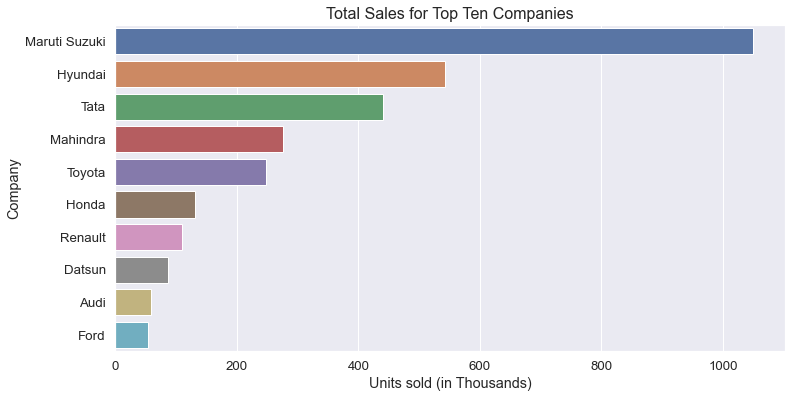

In [65]:
make_wise_sale=car.groupby('Make')[['sale_quantity']].sum().sort_values('sale_quantity',ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.set(font_scale = 1.2)

plt.title('Total Sales for Top Ten Companies', fontsize=16)
sns.barplot(make_wise_sale.sale_quantity,make_wise_sale.sale_quantity.index)
plt.xlabel('Units sold (in Thousands)');
plt.ylabel('Company');

Maruti Suzuki is leading with the highest number of sales in 2021, while Hyundai and Tata are in second and third position, respectively.

### 3.1.2 Total Revenue Generated for Top Ten Companies

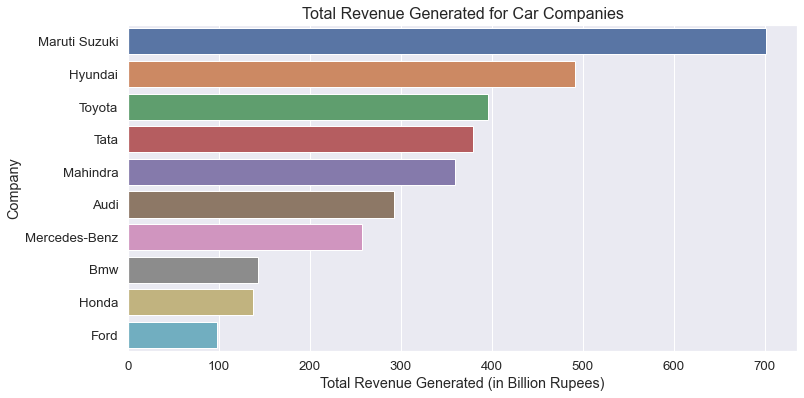

In [66]:
make_wise_revenue=car.groupby('Make')[['Total_revenue']].sum().sort_values('Total_revenue',ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.title('Total Revenue Generated for Car Companies', fontsize=16)
sns.barplot(make_wise_revenue.Total_revenue,make_wise_revenue.index)
plt.xlabel('Total Revenue Generated (in Billion Rupees)');
plt.ylabel('Company');

The Maruti Suzuki has the largest overall revenue, as seen in the graph. 

Hyundai is now in second place. 

We can observe that Toyota sells less cars than Tata. However, Toyota's overall revenue
exceeds Tata's. 

As a result, it may be argued that Toyota's high-priced automobiles are more popular than Tata's.

### 3.1.3 Price wise Total Sales

The graph between total sales and automobile price is plotted below. . 

Companies can use this graph to determine the consumer's budget when for a car.

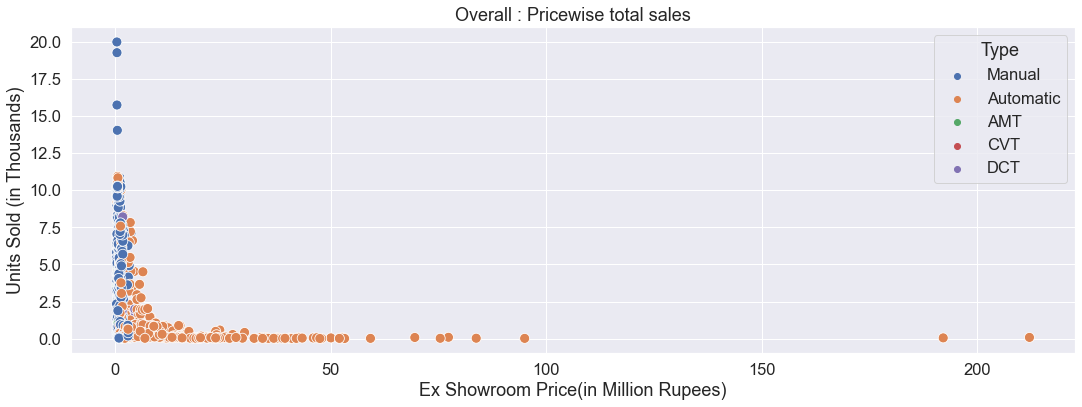

In [67]:
sns.set(font_scale=1.5)

plt.figure(figsize=(18, 6))
sns.scatterplot(x='Ex_Showroom_Price', 
                y='sale_quantity', 
                s=100,hue='Type',
                data=car);
plt.title('Overall : Pricewise total sales')
plt.xlabel('Ex Showroom Price(in Million Rupees)');
plt.ylabel('Units Sold (in Thousands)');


It is obvious from the graph above that automobiles with modest prices (below 20 lakhs) are sold in big numbers. 

While the sales are lesser for cars with high prices. 


Below Pie chart shows distribution of sales for different price ranges. 

Price range has been divided into three groups: low price range, medium price range, high price range

Low Price Range : Below  1.5 Million Rs

Medium Price Range : Between 1.5 Million Rs and 5 Million Rs

High Price Range : Above 5 Million Rs



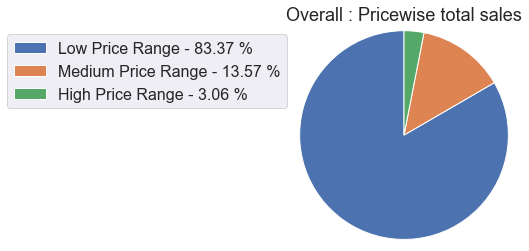

In [68]:
mx=car['Ex_Showroom_Price'].max()
car['Price_Range']=pd.cut(x=car['Ex_Showroom_Price'], bins=[0,1.5,5,mx+2e7], labels=['Low Price Range','Medium Price Range','High Price Range'])
fin=car.groupby('Price_Range')[['sale_quantity']].sum()   
y = np.array(fin['sale_quantity'])
x=np.array(fin.index)
percent = 100.*y/y.sum()
plt.pie(y,startangle=90, radius=1.2)
plt.title('Overall : Pricewise total sales')
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
plt.legend(labels, loc='best',bbox_to_anchor=(0, 1.), fontsize=16);

Low price Range (Below 1.5 Million Rs) has more than 83% sales share.

### 3.1.4 Overall Sales for different Body Types

Overall sales of top seven Body Types:

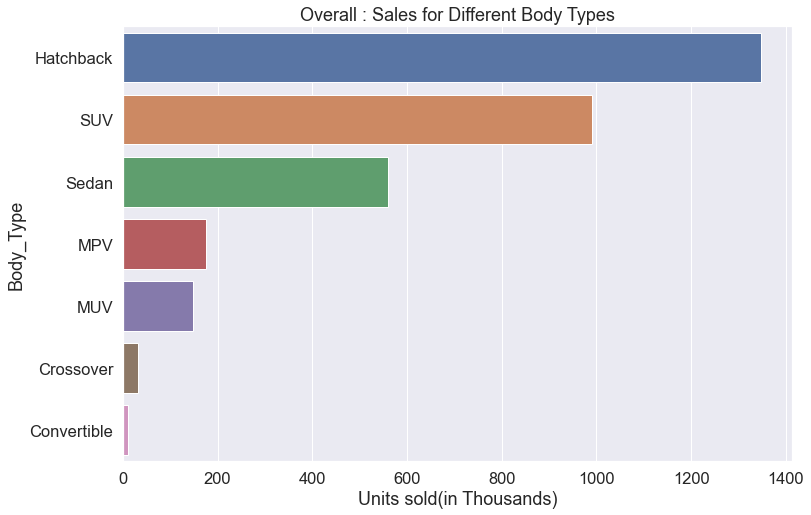

In [69]:
body_wise_sale=car.groupby('Body_Type')[['sale_quantity']].sum().sort_values('sale_quantity',ascending=False).head(7)
plt.figure(figsize=(12,8))
sns.barplot(x=body_wise_sale.sale_quantity, y=body_wise_sale.index)
plt.title('Overall : Sales for Different Body Types')
plt.xlabel('Units sold(in Thousands)');

As can be seen from the graph above, Hatchback automobile sales are highest.

This information can help companies to determine the body type that should be manufactured in the future.

### 3.1.5 Total Revenue for different Body Types

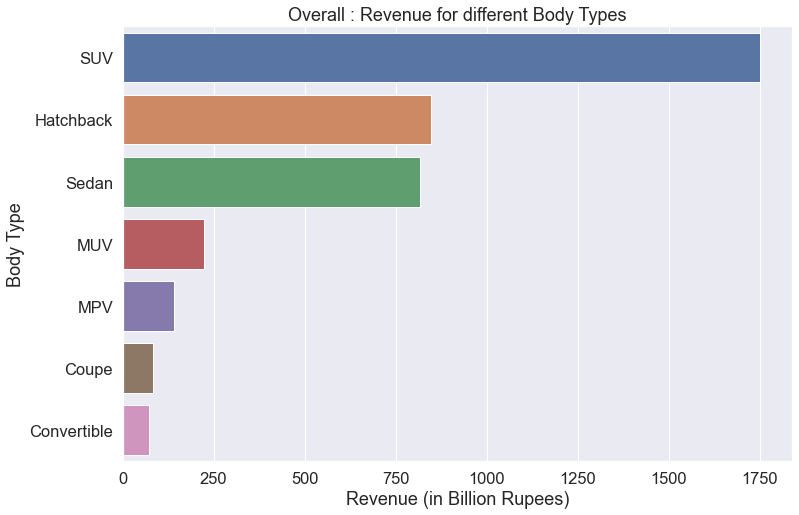

In [70]:
body_wise_sale=car.groupby('Body_Type')[['Total_revenue']].sum().sort_values('Total_revenue',ascending=False).head(7)
plt.figure(figsize=(12,8))
sns.barplot(x=body_wise_sale.Total_revenue, y=body_wise_sale.index)
plt.title('Overall : Revenue for different Body Types')
plt.ylabel('Body Type');
plt.xlabel('Revenue (in Billion Rupees)');

Although the sales of Hatchback are more than Sedan,but the total revenue for Sedan is much more than that of Hatchback. 


### 3.1.6 Monthwise Sales of Cars

Monthwise distribution of total sales: 

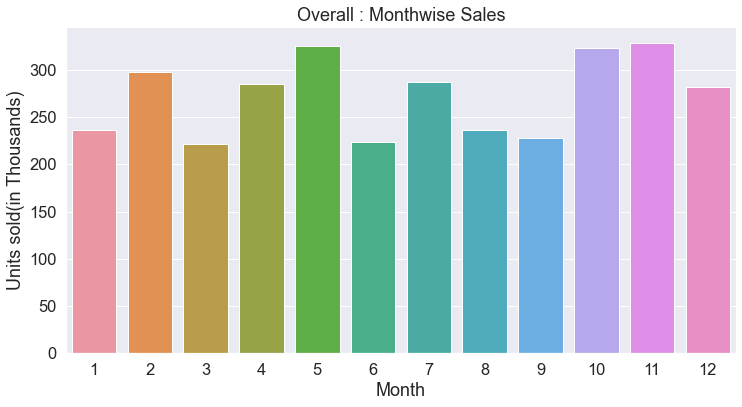

In [71]:
month_wise_sale=car.groupby('sale_month')[['sale_quantity']].sum()
plt.figure(figsize=(12,6))
sns.barplot(x=month_wise_sale.index, y=month_wise_sale.sale_quantity)
plt.title('Overall : Monthwise Sales')
plt.xlabel('Month');
plt.ylabel('Units sold(in Thousands)');

As can be observed, sales are at their peak in November.

Sales are also excellent in October, May, and February. 

The largest sales in October and November are likely due to the festival season. 

The month of March had the lowest sales. 

Companies can use this info as one of the factors to determine best moment to launch their product.

### 3.1.7 Monthwise Total Revenue

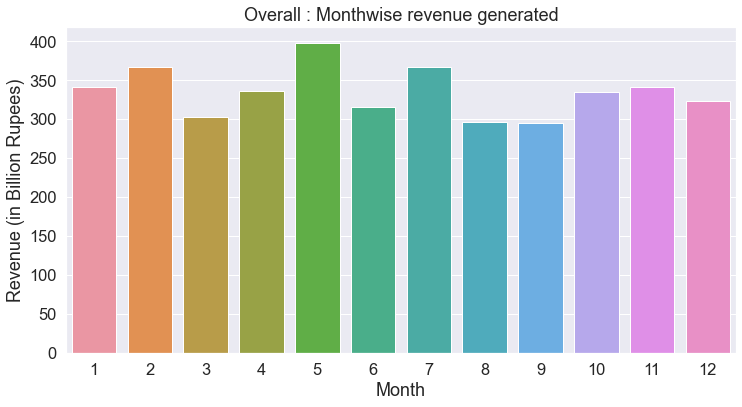

In [72]:
month_wise_sale=car.groupby('sale_month')[['Total_revenue']].sum()
plt.figure(figsize=(12,6))
sns.barplot(x=month_wise_sale.index, y=month_wise_sale.Total_revenue)
plt.title('Overall : Monthwise revenue generated')
plt.ylabel('Revenue (in Billion Rupees)');
plt.xlabel('Month');

Revenue is highest in the month of May.

Sale of relatively low price cars migh be the reson of low revenue genereated in November.

### 3.1.8 Fuel Type Distribution

#### 3.1.8 a) Fuel Type Distribution According to Number of Models of Car

Lets check how many percentage of total models use Petrol, Diesel,CNG and other types as fuel type: 

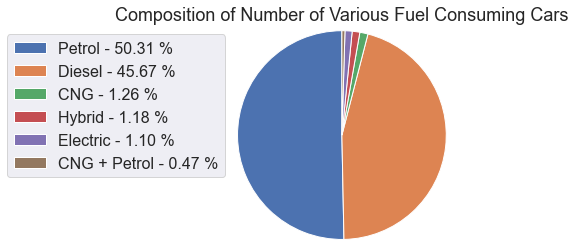

In [73]:
f=car['Fuel_Type'].value_counts()
y = np.array(f)
x=np.array(f.index)
percent = 100.*y/y.sum()
plt.pie(y,startangle=90, radius=1.2)
plt.title('Composition of Number of Various Fuel Consuming Cars')
        
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

plt.legend(labels, loc='best',bbox_to_anchor=(0, 1.), fontsize=16);

The majority of automobiles utilise Petrol or Diesel. 



#### 3.1.8 b) Fuel Type Wise Total Sales of Cars

Lets look at fuel type corresponding to highest sale:

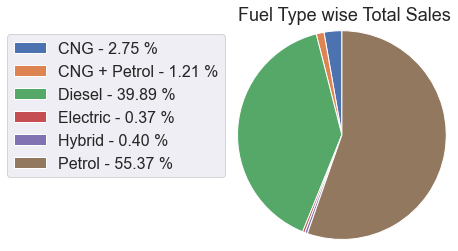

In [74]:
fin=car.groupby('Fuel_Type')[['sale_quantity']].sum()
y = np.array(fin['sale_quantity'])
x=np.array(fin.index)
percent = 100.*y/y.sum()
plt.pie(y,startangle=90, radius=1.2)
plt.title(' Fuel Type wise Total Sales')
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
plt.legend(labels, loc='best',bbox_to_anchor=(0, 1.), fontsize=16);

Petrol cars are the most popular, followed by diesel cars.

### 3.1.9 Emission Norm Type Distribution 

#### 3.1.9 a) Emission Norm Type Distribution According to Number of Models of Car

Let's see what % of total models employ each sort of emission norm, such as BS III, BS IV, and BS VI:


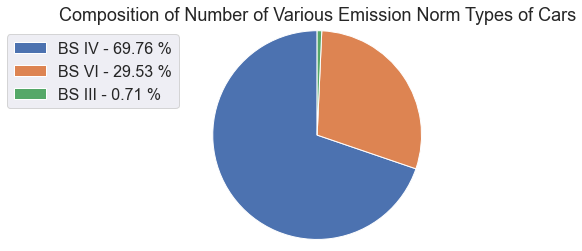

In [75]:
f=car['Emission_Norm'].value_counts()
y = np.array(f)
x=np.array(f.index)
percent = 100.*y/y.sum()
plt.pie(y,startangle=90, radius=1.2)
plt.title('Composition of Number of Various Emission Norm Types of Cars')
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
plt.legend(labels, loc='best',bbox_to_anchor=(-0.1, 1.), fontsize=16);

It can be inferred that the BS III norm type is the least commonly utilised and is hence obsolete.

Cars mostly utilise BS IV, with BS VI coming in second.

#### 3.1.9 b) Emission Norm wise Distribution of Sales

Let's check which kind of Emissions Standards vehicles have sold the most:

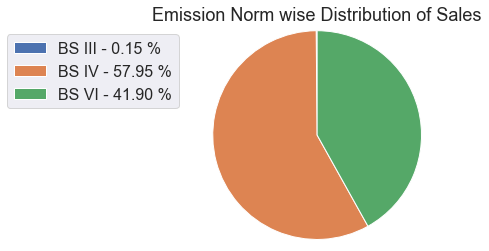

In [76]:
fin=car.groupby('Emission_Norm')[['sale_quantity']].sum()
y = np.array(fin['sale_quantity'])
x=np.array(fin.index)
percent = 100.*y/y.sum()
plt.pie(y,startangle=90, radius=1.2)
plt.title('Emission Norm wise Distribution of Sales')
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
plt.legend(labels, loc='best',bbox_to_anchor=(-0.1, 1.), fontsize=16);

BS IV and BS VI cars are sold more, BS III the least. 

### 3.1.10 Distribution for Different Transmission Types

#### 2.1.10 a)  Total Sales Distribution for Different Transmission Types 

Let's check which type of transmission has the most sales:

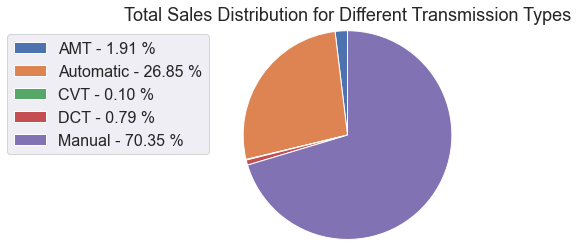

In [77]:
fin=car.groupby('Type')[['sale_quantity']].sum()
y = np.array(fin['sale_quantity'])
x=np.array(fin.index)
percent = 100.*y/y.sum()
plt.pie(y,startangle=90, radius=1.2)
plt.title('Total Sales Distribution for Different Transmission Types')
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
plt.legend(labels, loc='best',bbox_to_anchor=(-0.1, 1.), fontsize=16);

Manual autos account for 70.35 percent of overall sales.

The share of Automatic transmission may increase in the future.

#### 3.1.10 b) Transmission Type Distribution According to Number of Models of Car

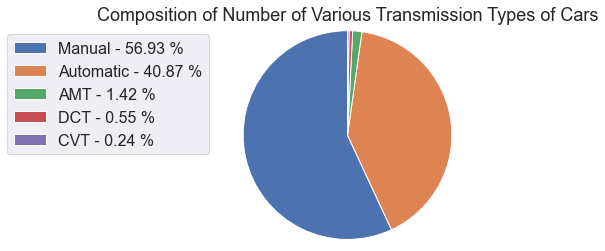

In [78]:
f=car['Type'].value_counts()
y = np.array(f)
x=np.array(f.index)
percent = 100.*y/y.sum()
plt.pie(y,startangle=90, radius=1.2)
plt.title('Composition of Number of Various Transmission Types of Cars')
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
plt.legend(labels, loc='best',bbox_to_anchor=(-0.1, 1.), fontsize=16);

 About 57 percent of automobile models are manual, while 41 percent are automatic.

### 3.1.11 Top Popular Specification Combination of Cars

#### 3.1.11 a) Salewise Top Popular Specification Combination of Transmission, Emission Norm and Fuel          Type

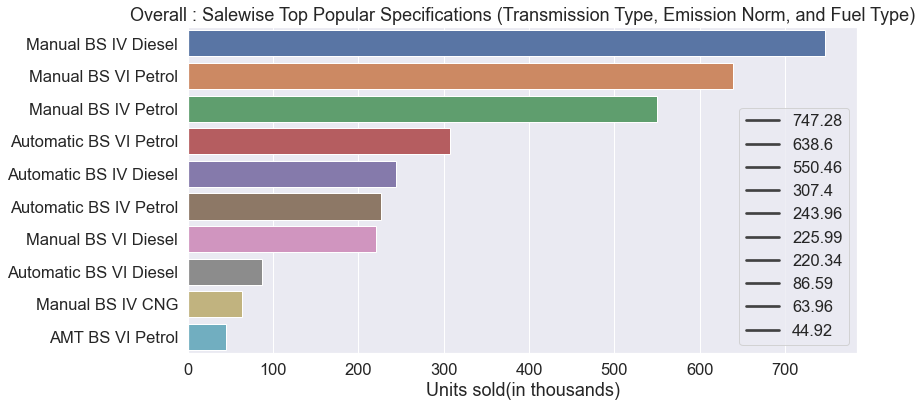

In [79]:
df=car[['sale_quantity']]
pd.options.mode.chained_assignment = None
df['specification']=car['Type']+" "+car['Emission_Norm']+ " "+car['Fuel_Type']
df=df.groupby('specification')[['sale_quantity']].sum().sort_values('sale_quantity',ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.set(font_scale=1.5)
sns.barplot(x=df.sale_quantity, y=df.index)
plt.title('Overall : Salewise Top Popular Specifications (Transmission Type, Emission Norm, and Fuel Type)')
plt.ylabel(None);
plt.xlabel('Units sold(in thousands)')
plt.legend(np.round(df.sale_quantity,2));

it can be seen that salewise the most popular combination of Transmission type, Emission Norm, and Fuel Type is:

Manual, BS IV, Diesel.

#### 3.1.11 b) Salewise Top Popular Specification Combination of Mileage and Body Type

The Mileage Range is divided into three groups :

Low Mileage Range : Below  12 km/Litre

Medium Mileage Range : Between 12 and 24 km/Litre

High Mileage Range : Above 24 km/Litre

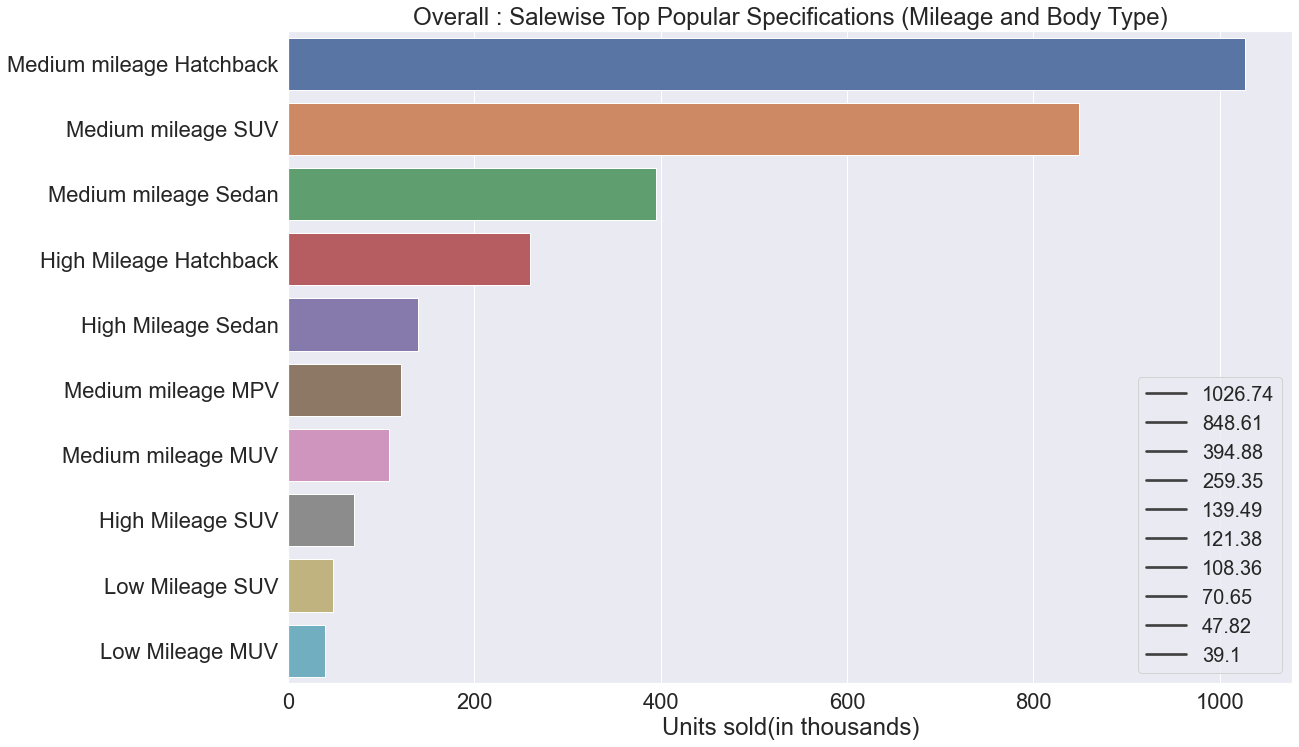

In [80]:
car_copy=car.copy()
condition=car_copy.ARAI_Certified_Mileage.isna()
car_copy=car_copy[~condition]
car_copy=car_copy.reset_index(drop=True)


df=car_copy[['sale_quantity']]
df['mileage']=pd.cut(x=car_copy['ARAI_Certified_Mileage'], bins=[0,12,24,50], labels=['Low Mileage','Medium mileage','High Mileage'])
df['mileage']=df.mileage.astype(str)
df['specification']=df['mileage']+" "+car_copy['Body_Type']
    
df=df.groupby('specification')[['sale_quantity']].sum().sort_values('sale_quantity',ascending=False).head(10)
plt.figure(figsize=(18,12))
sns.set(font_scale=2)
sns.barplot(x=df.sale_quantity, y=df.index)
plt.title('Overall : Salewise Top Popular Specifications (Mileage and Body Type)')
plt.ylabel(None);
plt.xlabel('Units sold(in thousands)');
plt.legend(np.round(df.sale_quantity,2),fontsize=20);

Medium mileage hatchbacks are the most popular, while medium mileage SUVs are the second most popular combination of mileage and body type.

#### 3.1.11 c) Salewise Top Popular Specification Combination of Price and Fuel Type

Price range is divided in three groups :

Low Price Range : Below  1.5 Million Rs

Medium Price Range : Between 1.5 Million Rs and 5 Million Rs

High Price Range : Above 5 Million Rs
    


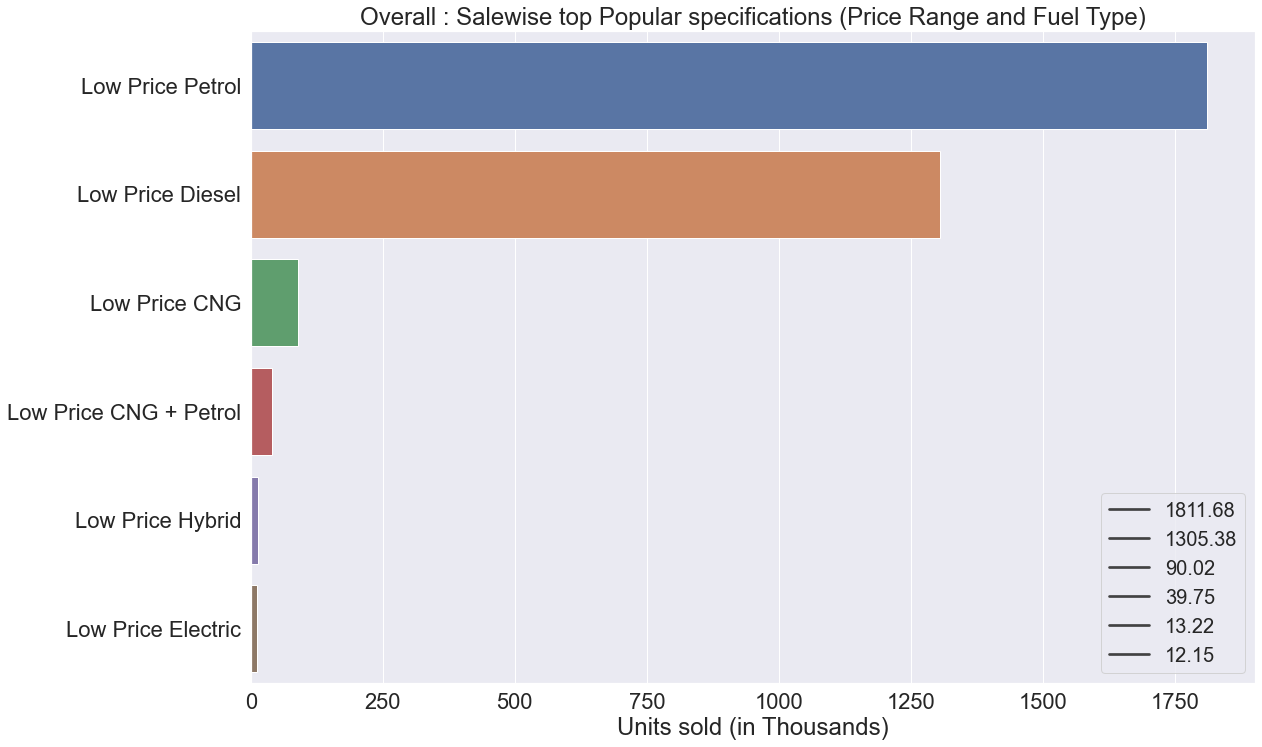

In [81]:
df=car[['sale_quantity']]
df['price_range']=pd.cut(x=car['Ex_Showroom_Price'], bins=[0,2e6,5e6,car.Ex_Showroom_Price.max()+2e7], labels=['Low Price','Medium Price','High Price'])
df['price_range']=df.price_range.astype(str)
df['specification']=df['price_range']+" "+car['Fuel_Type']
df=df.groupby('specification')[['sale_quantity']].sum().sort_values('sale_quantity',ascending=False).head(10)
plt.figure(figsize=(18,12))
sns.barplot(x=df.sale_quantity, y=df.index)
plt.title('Overall : Salewise top Popular specifications (Price Range and Fuel Type)')
plt.ylabel(None);
plt.xlabel('Units sold (in Thousands)')
plt.legend(np.round(df.sale_quantity,2),fontsize=20, loc='lower right');

The most popular specification of Price and Fuel Type is (Low Price, Petrol) with highest sales.

## **3.2 Individual Analysis**

### 3.2.1 Sales for Different Models of Company

Now lets check which model has the most sales for a certain company. 

To do this, a function is defined. It accepts one argument as the maker's name.

In [82]:
# Defining function:
def quant_vs_model(x) :
    model=car[car.Make==x]
    model_wise_sale=model.groupby('Model')[['sale_quantity']].sum().sort_values('sale_quantity',ascending=False)
    sns.set(font_scale=1.2)
    plt.figure(figsize=(12,6))
    plt.xticks(rotation=75)
    plt.title(x +' : Sales for different models')
    
    sns.barplot(model_wise_sale.sale_quantity.index,model_wise_sale.sale_quantity)
    plt.ylabel('Units sold (in Thousands)')

### 3.2.1.1 Sales for Tata Company:

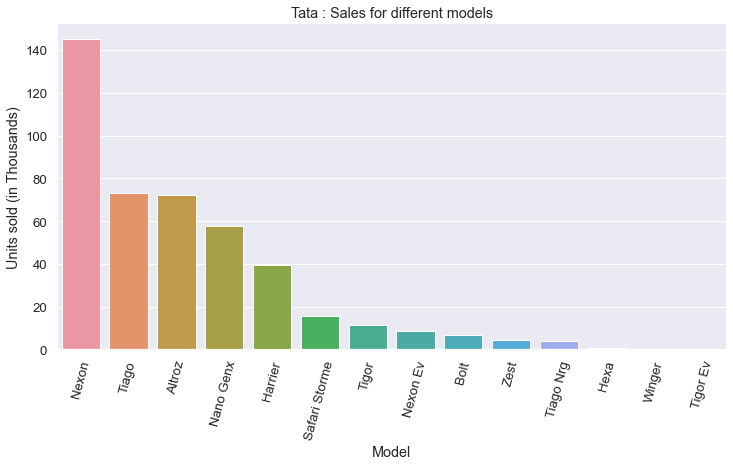

In [83]:
quant_vs_model('Tata')

Nexon has maximum sales among its all models

### 3.2.2 Total Revenue Generated for Different Models of Company

In [84]:
def revenue_vs_model(x):
    model=car[car.Make==x]
    model_wise_sale=model.groupby('Model')[['Total_revenue']].sum().sort_values('Total_revenue',ascending=False)
    
    plt.figure(figsize=(12,6))
    plt.xticks(rotation=75)
    plt.title(x + ': Revenue generated for different models')
    sns.barplot(model_wise_sale.Total_revenue.index,model_wise_sale.Total_revenue)
    plt.ylabel('Revenue (in Billion Rupees)')

### 3.2.2.1 Total Revenue Generated by different models of Tata company

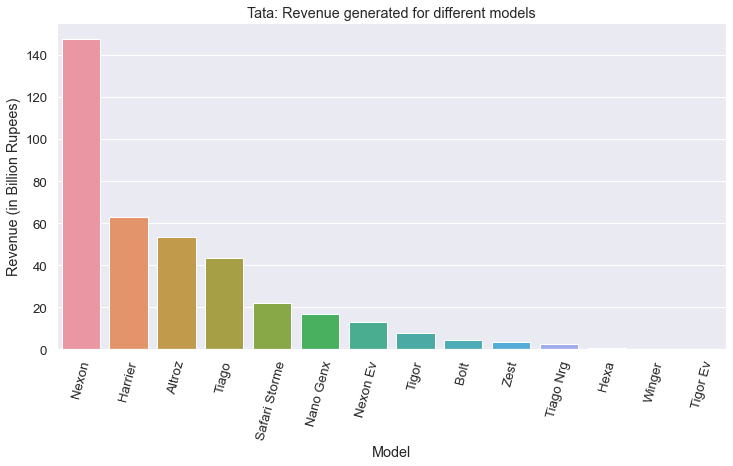

In [85]:
revenue_vs_model('Tata')

Nexon generates maximum revenue among all models manufactured by Tata

### 3.2.3 Total Sales for Different Body Types of Company

In [86]:
def body_vs_quant(x):
    model=car[car.Make==x]
    body_wise_sale=model.groupby('Body_Type')[['sale_quantity']].sum().sort_values('sale_quantity',ascending=False)
    plt.figure(figsize=(12,6))
    sns.barplot(x=body_wise_sale.sale_quantity, y=body_wise_sale.index)
    plt.title(x +' : Sales for different Car Body Types')
    plt.ylabel('Body Type of a Car');
    plt.xlabel('Units Sold (in Thousands)');
    plt.legend(np.round(body_wise_sale.sale_quantity,2));
        

Total sales for different body types of Toyota:

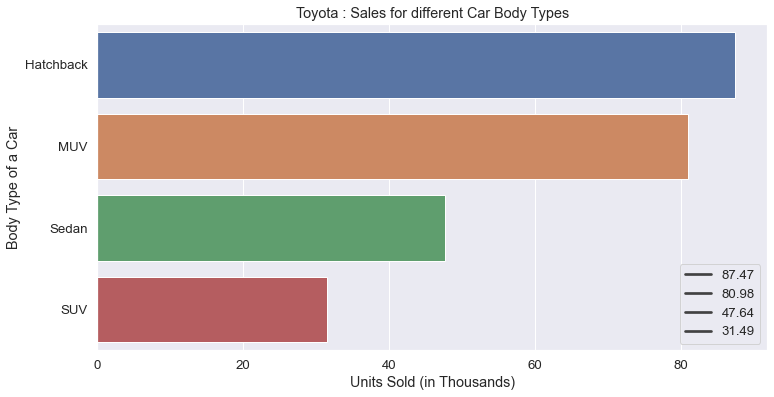

In [87]:
body_vs_quant('Toyota')

 Toyota's Hatchback models sell the most.

### 3.2.4 Total Sales for Different Body Types of Company

In [88]:
def body_vs_revenue(make):
    model=car[car.Make==make]
    body_wise_sale=model.groupby('Body_Type')[['Total_revenue']].sum().sort_values('Total_revenue',ascending=False)
    plt.figure(figsize=(12,6))
    sns.barplot(x=body_wise_sale.Total_revenue, y=body_wise_sale.index)
    plt.title(make + ': Total revenue generated for different car body types')
    plt.ylabel('Body Types');
    plt.xlabel('Total revenue generated (in Billion Rupees)')
    plt.legend(np.round(body_wise_sale.Total_revenue,2));

Let's check revenue generated for different body types for Toyota

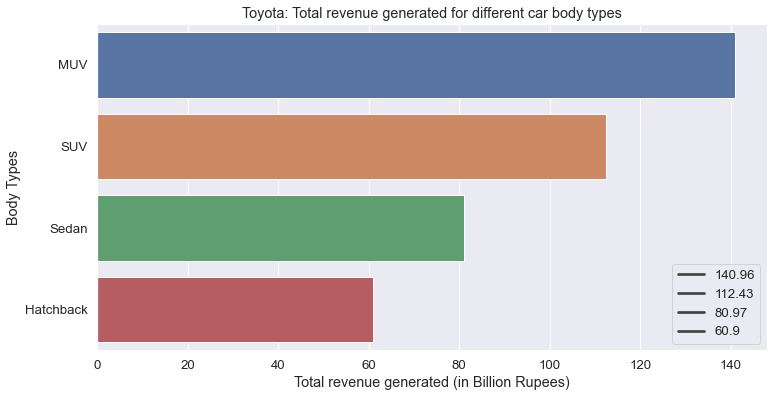

In [89]:
body_vs_revenue('Toyota')

Toyota's MUVs generate maxmimum revenue

### 3.2.5 Fuel Type Distribution of Company

#### 3.2.5 a) Distribution of Number of models of Different Fuel Types of a company

In [90]:
def fuel_type_vs_model(make) :
    model=car[car.Make==make]
    f=model['Fuel_Type'].value_counts()
    y = np.array(f)
    x=np.array(f.index)
    percent = 100.*y/y.sum()
    plt.pie(y,startangle=90, radius=1.2)
    plt.title(make+ ' : Composition of various fuel consuming cars', fontsize=18)
        
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

    plt.legend(labels, loc='best',bbox_to_anchor=(0, 1.), fontsize=16)

Fuel type distribution for Maruti Suzuki:

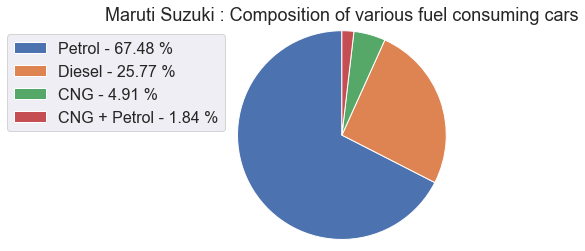

In [91]:
fuel_type_vs_model('Maruti Suzuki')

 67.48 percent of Maruti Suzuki vehicles are petrol vehicles, while 25.77 percent are diesel vehicles.

#### 3.2.5 b) Fuel Type Wise Total Sales of Cars of a company


In [92]:
def fueltype_vs_sale(make) :
    model=car[car.Make==make]
    fin=model.groupby('Fuel_Type')[['sale_quantity']].sum()
    y = np.array(fin['sale_quantity'])
    x=np.array(fin.index)
    percent = 100.*y/y.sum()
    plt.pie(y,startangle=90, radius=1.2)
    plt.title(make + ' : Distribution of Sales for different fuel types', fontsize=18)
        
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
    plt.legend(labels, loc='best',bbox_to_anchor=(0, 1.), fontsize=16)

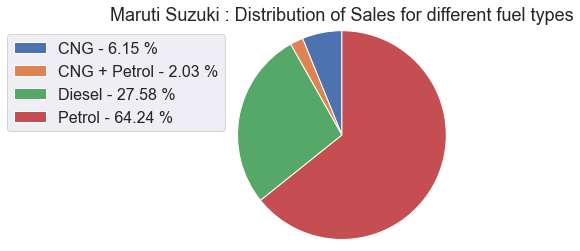

In [93]:
fueltype_vs_sale('Maruti Suzuki')

 Petrol cars account for 64.24 % of Maruti Suzuki's total sales.

### 3.2.6 Monthwise Distribution of Sales of Company

#### 3.2.6 a) Monthwise Total Sales of a company

In [94]:
def month_vs_quant(x):
    model=car[car.Make==x]
    month_wise_sale=model.groupby('sale_month')[['sale_quantity']].sum()
    plt.figure(figsize=(12,6))
    sns.barplot(x=month_wise_sale.index, y=month_wise_sale.sale_quantity)
    plt.title(x + ' : Monthwise sales distribution', fontsize=18)
    plt.ylabel('Units sold (in Thousands)');
    plt.xlabel('Month')

Month-wise Distribution of total sales of Tata: 

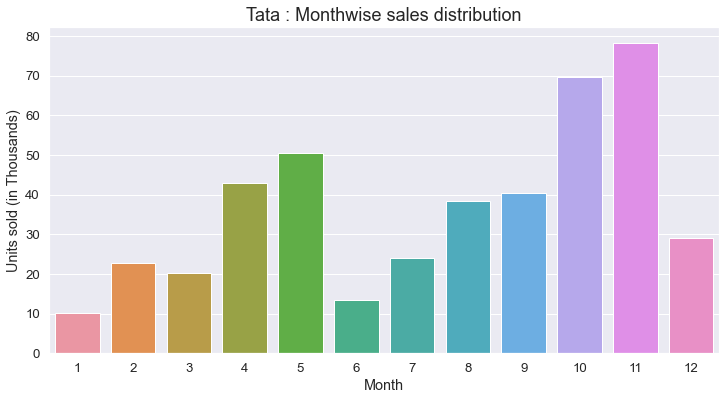

In [95]:
month_vs_quant('Tata')

In October and November, sales are at their highest.

This might be due to the festival season in these two months.

#### 3.2.6 b) Monthwise Total Revenue Generated of a company

In [96]:
def month_vs_revenue(x):
    model=car[car.Make==x]
    month_wise_sale=model.groupby('sale_month')[['Total_revenue']].sum()
    plt.figure(figsize=(12,6))
    sns.barplot(x=month_wise_sale.index, y=month_wise_sale.Total_revenue)
    plt.title(x + ' : Monthwise distribution of generated revenue')
    plt.ylabel('Revenue (in Billion Rupees)');
    plt.xlabel('Month')
   

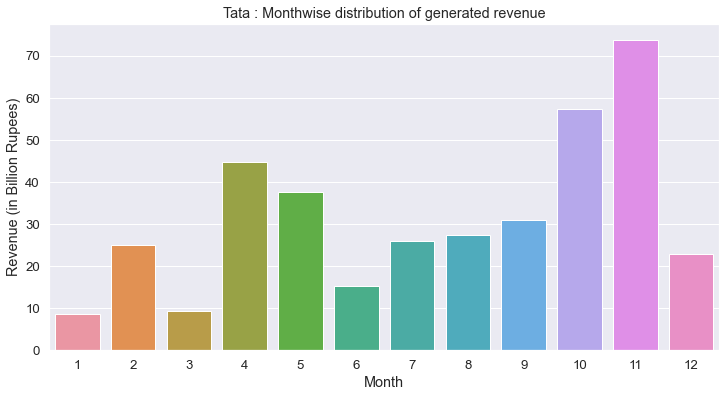

In [97]:
month_vs_revenue('Tata')

Revenue is highest in the month of November and 2nd highest in the month of October.
Sales also follow the same pattern.

### 3.2.7 Emission Norm Type Distribution of Company

#### 3.2.7 a) Emission Norm Type Distribution According to Number of Models of Car

In [98]:
def emission_norm_vs_model(make) :
    model=car[car.Make==make]
    f=model['Emission_Norm'].value_counts()
    y = np.array(f)
    x=np.array(f.index)
    percent = 100.*y/y.sum()
    plt.pie(y,startangle=90, radius=1.2)
    plt.title(make + ' : Composition of various Emission Norm Types', fontsize=18)
        
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

    plt.legend(labels, loc='best',bbox_to_anchor=(0, 1.), fontsize=16)

Let's check what proportion of Audi models have BS IV, BS III, or BS VI emission norms:

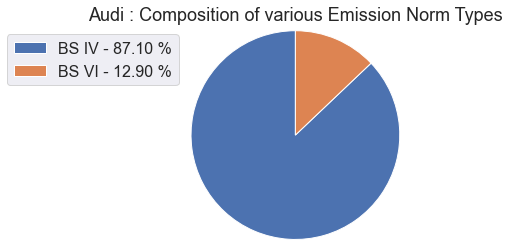

In [99]:
emission_norm_vs_model('Audi')

87.10% of Audi vehicles are BS IV, while the remaining are BS VI.

#### 3.2.7 b) Emission Norm wise Distribution of Sales

In [100]:
def emissionnorm_vs_sale(make) :
    model=car[car.Make==make]
    fin=model.groupby('Emission_Norm')[['sale_quantity']].sum()
    y = np.array(fin['sale_quantity'])
    x=np.array(fin.index)
    percent = 100.*y/y.sum()
    plt.pie(y,startangle=90, radius=1.2)
    plt.title(make + ' : Composition of Sales for different Emission Norms')
        
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

    plt.legend(labels, loc='best',bbox_to_anchor=(0, 1.), fontsize=16)

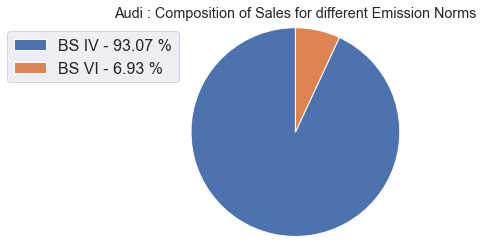

In [101]:
emissionnorm_vs_sale('Audi')

Around 93% Audi cars sold are BS IV ,and remaining 7% are BS VI 

### 3.2.8 Distribution of Sales for Different Price Segments of a Company

Price range is divided in three groups :

Low Price Range : Below  1.5 Million Rs

Medium Price Range : Between 1.5 Million Rs and 5 Million Rs

High Price Range : Above 5 Million Rs

In [102]:
def sale_quantity_vs_price(make) :
    model=car[car.Make==make]
    mx=model['Ex_Showroom_Price'].max()
    model['Price_Range']=pd.cut(x=model['Ex_Showroom_Price'], bins=[0,1.5,5,mx+2], labels=['Low Price Range','Medium Price Range','High Price Range'])
    fin=model.groupby('Price_Range')[['sale_quantity']].sum()   
    y = np.array(fin['sale_quantity'])
    x=np.array(fin.index)
    percent = 100.*y/y.sum()
    plt.pie(y,startangle=90, radius=1.2)
    plt.title( make + ' : Composition of Sales for different price segments')
        
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

    plt.legend(labels, loc='best',bbox_to_anchor=(0, 1.), fontsize=16)

Distribution of sales for different price ranges for Toyota :

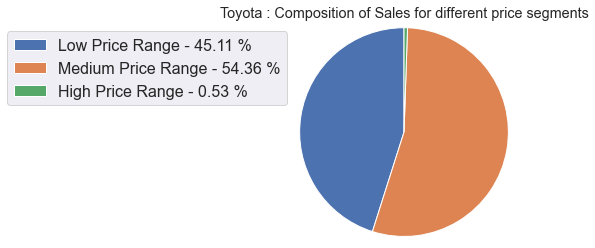

In [103]:
sale_quantity_vs_price('Toyota')

Sales are more in Medium Price Range for Toyota.

### 3.2.9 Distribution for Different Transmission Types of a Company

#### 3.2.9 a) Total Sales Distribution for Different Transmission Types of a Company

Let's check Transmission Type corresponding to highest sales.

In [104]:
def type_vs_sale(make) :
    model=car[car.Make==make]
    fin=model.groupby('Type')[['sale_quantity']].sum()
    y = np.array(fin['sale_quantity'])
    x=np.array(fin.index)
    percent = 100.*y/y.sum()
    plt.pie(y,startangle=90, radius=1.2)
    plt.title(make + ' : Composition of Sales for different transmission types')
        
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

    plt.legend(labels, loc='best',bbox_to_anchor=(0, 1.), fontsize=16)

Mahindra:

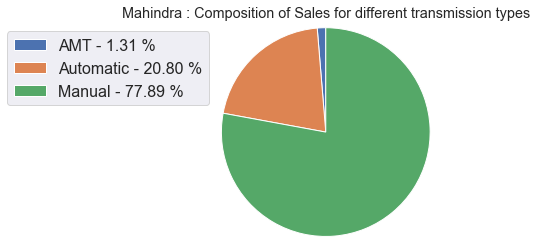

In [105]:
type_vs_sale('Mahindra')

Manual cars account for 77.89 percent of Mahindra's sales, while automatic cars account for 20.80 percent. 

The remaining sales are of AMT vehicles. 

#### 3.1.10 b) Transmission Type Distribution According to Number of Models of Car


In [106]:
def type_vs_model(make) :
    model=car[car.Make==make]
    y = np.array(model['Type'].value_counts())
    x=np.array(model['Type'].unique())
    percent = 100.*y/y.sum()
    plt.pie(y,startangle=90, radius=1.2)
    plt.title(make + ' : Composition of different transmission types cars')
        
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

    plt.legend(labels, loc='best',bbox_to_anchor=(-0.1, 1.), fontsize=16)

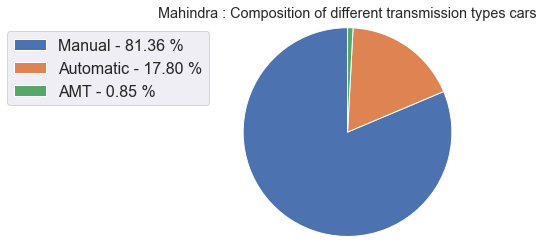

In [107]:
type_vs_model('Mahindra')

81.36 percent of Mahindra vehicles are manual, 17.80 percent are automatic, and the remainder are AMT.

### 3.2.11 Top Popular Specification Combination of Cars of a Company

#### 3.1.11 a) Salewise Top Popular Specification Combination of Transmission, Emission Norm and Fuel Type

In [108]:
def popular_specification_type_emission_fueltype(make) :
    model=car[car.Make==make]
    df=model[['sale_quantity']]
    df['specification']=model['Type']+" "+model['Emission_Norm']+ " "+model['Fuel_Type']
    df=df.groupby('specification')[['sale_quantity']].sum().sort_values('sale_quantity',ascending=False).head(10)
    plt.figure(figsize=(12,6))
    sns.barplot(x=df.sale_quantity, y=df.index)
    plt.title(make + ' : Salewise top popular specifications (Transmission type, Emission Norm, Fuel Type)')
    plt.xlabel('Units Sold (in Thousands)');
    plt.ylabel(None)
    plt.legend(np.round(df.sale_quantity,2));

Popular specification combination for Renault:

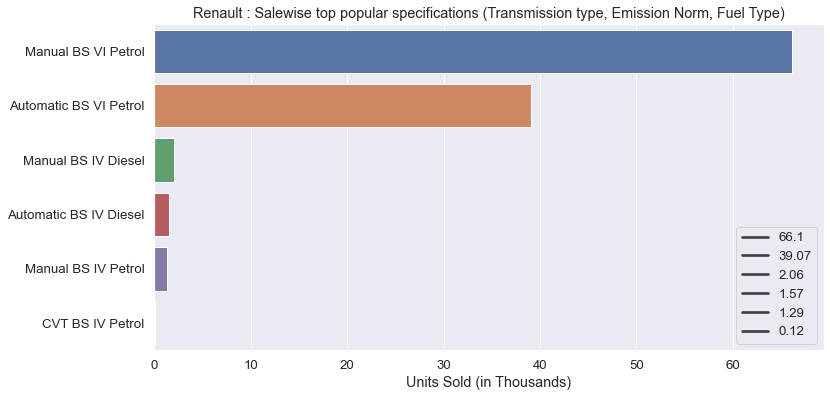

In [109]:
popular_specification_type_emission_fueltype('Renault')

For Renault, Manual BS VI Petrol is popular specification combination of Transmission Type, Emission Norm and Fuel Type.

#### 3.2.11 b) Salewise Top Popular Specification Combination of Mileage and Body Type of a company


The Mileage Range is divided in three groups :

Low Mileage Range : Below 12 km/Litre

Medium Mileage Range : Between 12 and 24 km/Litre

High Mileage Range : Above 24 km/Litre

In [110]:
def popular_specification_mileage_bodytype(make):
    model=car[car.Make==make].copy()
    
    condition=model.ARAI_Certified_Mileage.isna()
    model=model[~condition]
    model=model.reset_index(drop=True)
    
    df=model[['sale_quantity']]
    df['mileage']=pd.cut(x=model['ARAI_Certified_Mileage'], bins=[0,12,24,40], labels=['Low Mileage','Medium mileage','High Mileage'])
    df['mileage']=df.mileage.astype(str)
    df['specification']=df['mileage']+" "+model['Body_Type']
    
    df=df.groupby('specification')[['sale_quantity']].sum().sort_values('sale_quantity',ascending=False).head(10)
    plt.figure(figsize=(18,12))
    sns.set(font_scale=2)
    sns.barplot(x=df.sale_quantity, y=df.index)
    plt.title(make +' : Salewise top popular specifications (Mileage and Car Body Type) ')
    
    plt.ylabel(None);
    plt.xlabel('Units sold (in Thousands)')
    plt.legend(np.round(df.sale_quantity,2),fontsize=20);

Popular specification cobination of mileage and body type for Maruti Suzuki:

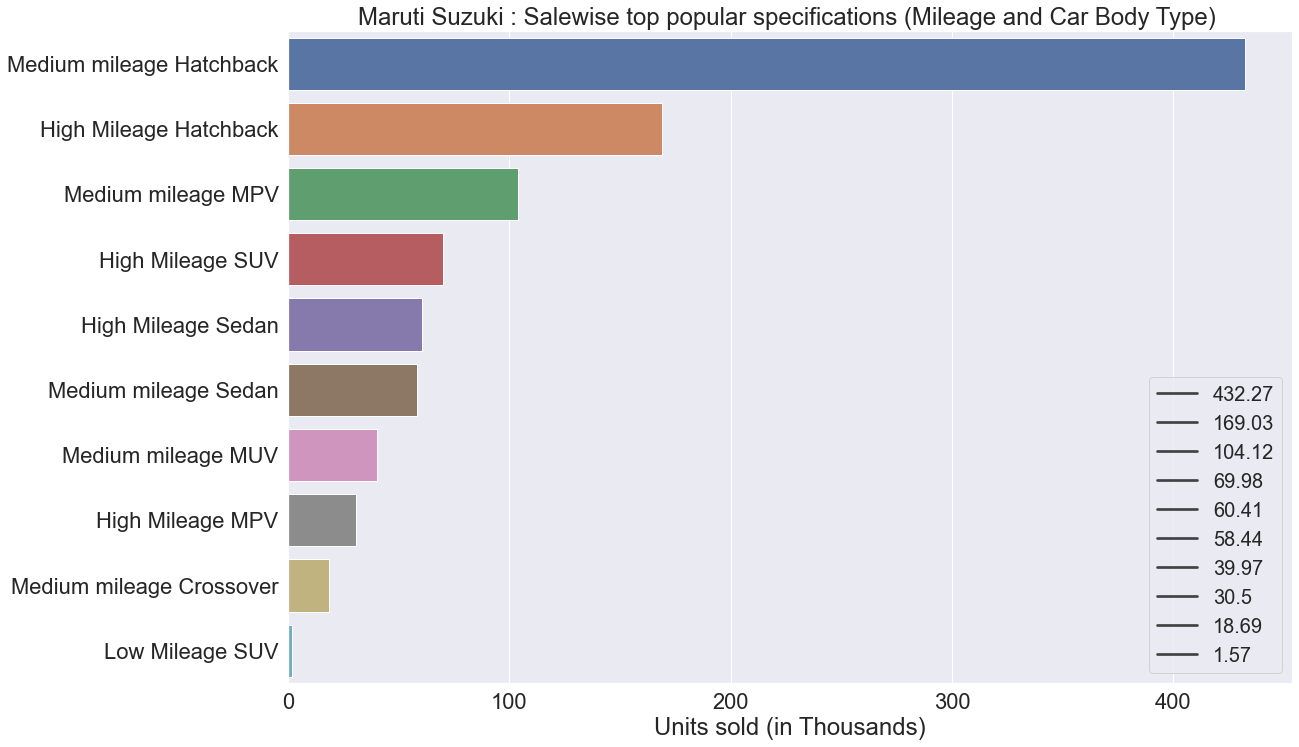

In [111]:
popular_specification_mileage_bodytype('Maruti Suzuki')

For Maruti Suzuki, Medium mileage Hatchback is the popular specification combination of mileage and body type

#### 3.2.11 c) Salewise Top Popular Specification Combination of Price and Fuel Type of a Company

Price range is divided in three groups :

Low Price Range : Below  1.5 Million Rs

Medium Price Range : Between 1.5 Million Rs and 5 Million Rs

High Price Range : Above 5 Million Rs

In [112]:
def popular_specification_price_fueltype(make):
    model=car[car.Make==make]
    df=model[['sale_quantity']]
    df['price_range']=pd.cut(x=model['Ex_Showroom_Price'], bins=[0,2,5,model.Ex_Showroom_Price.max()+2], labels=['Low Price','Medium Price','High Price'])
    df['price_range']=df.price_range.astype(str)
    df['specification']=df['price_range']+" "+model['Fuel_Type']
    
    df=df.groupby('specification')[['sale_quantity']].sum().sort_values('sale_quantity',ascending=False).head(10)
    plt.figure(figsize=(18,12))
    sns.barplot(x=df.sale_quantity, y=df.index)
    plt.title(make + ' : Salewise Top Popular Specifications(Price range and Fuel type)')
    plt.ylabel(None);
    plt.xlabel('Units sold (in Thousands) ')
    plt.legend(np.round(df.sale_quantity,2),fontsize=20);

Popular combination of price and fuel type for Toyota:

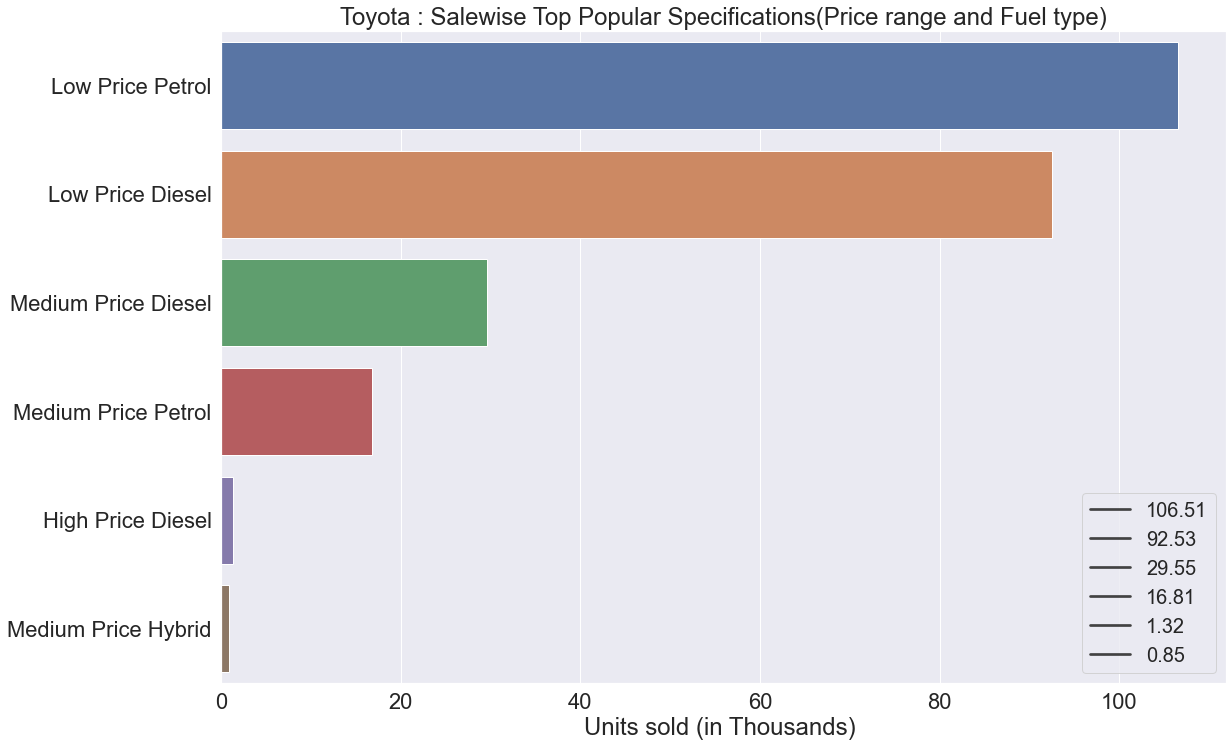

In [113]:
popular_specification_price_fueltype('Toyota')

Toyota's most popular specification combination(Price range and Fuel Type) is Low Price Petrol, while the second most popular specification combination is Low Price Diesel.

# 4. Web Application Developement:

The web application has been developed, using Streamlit library. 

# 5. Results Summary:
The following are some major findings from this dataset:
1.	Maruti Suzuki has the highest revenue, which is estimated to be approximately 700 billion rupees.


2.	Hatchbacks are the most popular automobile type, with the largest sales.


3.	Revenue-wise SUV is at the top position.


4.	Overall sales are at a peak around the period of October-November.


5.	An individual review of Tata sales suggests that they are at their peak in October and November.


6.	Overall, the following feature combinations generate the most sales:

    a. Transmission Type, Emission Norm, and Fuel Type: -> Manual, BS-IV, Diesel
    
    b. Mileage, Body Type: -> Medium Mileage (12-24 Km/Litre), Hatchback
    
    c. Price Range and Fuel Type: -> Low price (Below 1.5 million Rs), Petrol
    


7.	Overall, among the different fuel types, petrol automobiles have the biggest percentage of sales.


# 6. Conclusions:
1. The automobile dataset has been analyzed in the current study.


2. The study can provide a variety of insights that can aid in improved decision-making.


3. For example, a company can choose the best time to launch a new product by looking at month-by-month sales distribution.


4. When constructing a new automobile, the popularity of different specifications can be taken into account.


5. There are various elements to consider when determining the best timing to launch a product, automobile specs, etc.  Including such factors in the analysis would undoubtedly aid in better decision-making.


6. When compared to existing high-performing rivals, a company can utilise this sort of research to identify areas for development.


7. Here, I have assumed that this is a one-year dataset (2021). Furthermore, we can gain precise information about trends by gathering and analysing data for numerous years.


8. In addition, Machine learning can be used for both predictive and descriptive analysis.


9. With further data, performing sales forecasting , can help us anticipate the amount of sales based on features. 


10. These sorts of comprehensive data analytics can help us find solutions to a range of topics, including:

    a. Should a certain type of automobile be produced?
    
    b. What should the requirements be?

    c. In a given quarter, how many units should be produced?

    d. Is there a downward trend in sales?

    And so on.

11. Furthermore, sentiment analysis can provide us with information on people's sentiment towards a product.


12. This is a very vast field, and it has a lot of scope for future research

